In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression, make_swiss_roll
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

MACHINE LEARNING

II - UNSUPERVISED LEARNING

In [2]:
# Import the data
file_path = Path("/content/Copy_of_myopia.csv")
df = pd.read_csv(file_path)
df.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [3]:
# There were 81 myopic children samples and 537 non-myopic children samples
df["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [4]:
labels = df['MYOPIC']
labels.value_counts().nunique()

2

In [5]:
# Remove the Myopic Column
df = df.drop(columns=["MYOPIC", "DIOPTERHR"])
df.head()

,ID,STUDYYEAR,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,MOMMY,DADMY
0,1,1992,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,1,1
1,2,1995,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,1,1
2,3,1991,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,0,0
3,4,1990,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,0,1
4,5,1995,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,1,0


In [6]:
# Find null values
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")

Column ID has 0 null values
Column STUDYYEAR has 0 null values
Column AGE has 0 null values
Column GENDER has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [7]:
# Find duplicate entries
print(f"Duplicate entries: {df.duplicated().sum()}")

Duplicate entries: 0


Applying Dimensional Reduction

1 - Using PCA

In [8]:
# Standarize data with StandarScaler
myopia_scaled = StandardScaler().fit_transform(df)
print(myopia_scaled[0:2])

[[-1.7292504  -0.2072718  -0.42021911  1.02291623 -1.36391691 -0.89286055
   0.4837838  -0.28144248 -1.01979129  4.1506609   1.69744958 -0.68931054
  -0.67299591  0.18405806  0.98713773  1.0032415 ]
 [-1.72364505  1.52372783 -0.42021911  1.02291623 -0.3086122  -0.17183857
   0.53591074 -0.96799697 -0.13076248 -0.99889822 -0.91206246 -0.36187479
  -0.22140908 -0.34093217  0.98713773  1.0032415 ]]


In [9]:
# Applying PCA to reduce dimensions from 16 to 2

# Initialize PCA model
pca = PCA(n_components=2)

# Get two principal components for the myopia data.
myopia_pca = pca.fit_transform(myopia_scaled)

In [10]:
x_pca = pca.transform(myopia_scaled)
print(myopia_scaled.shape)
print(x_pca.shape)

(618, 16)
(618, 2)


In [11]:
# Transform PCA data to a DataFrame
df_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2"]
)
# , "principal component 3", "principal component 4", "principal component 5", "principal component 6", "principal component 7", "principal component 8", "principal component 9", "principal component 10", "principal component 11", "principal component 12"]
df_pca.head()

,principal component 1,principal component 2
0,0.035123,1.208329
1,0.569200,-2.082340
2,0.467051,-0.199586
3,0.291458,1.212209
4,-0.594317,-3.300141


In [12]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.18755892, 0.11269116])

2 - Using T-SNE

In [13]:
from sklearn.manifold import TSNE

In [14]:
# Initialize t-SNE model
tsne = TSNE(learning_rate='auto')

In [15]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [16]:
# The dataset has 2 columns
tsne_features.shape

(618, 2)

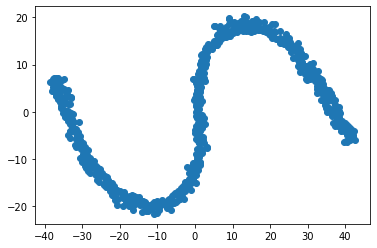

In [17]:
# Create a scatter plot of the t-SNE output
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

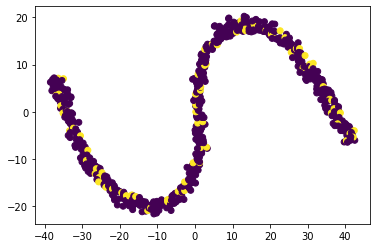

In [18]:
# Create a scatter plot of the t-SNE output
plt.scatter(tsne_features[:,0],tsne_features[:,1],c=labels)

Cluster Analysis with K-means

In [19]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,2968.872740
1,2,1790.378264
2,3,1187.414645
3,4,928.503251
4,5,732.053329


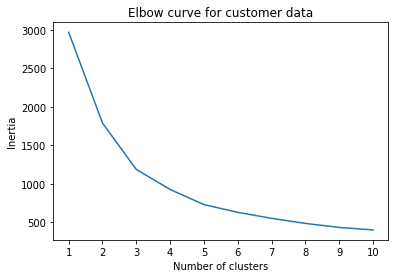

In [20]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [21]:
def get_clusters(k, df_pca):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(df_pca)

    # Predict clusters
    predictions = model.predict(df_pca)

    # Create return DataFrame with predicted clusters
    df_pca["class"] = model.labels_

    return df_pca

In [22]:
clusters = get_clusters(5, df_pca)

In [23]:
clusters

,principal component 1,principal component 2,class
0,0.035123,1.208329,3
1,0.569200,-2.082340,2
2,0.467051,-0.199586,2
3,0.291458,1.212209,3
4,-0.594317,-3.300141,4
...,...,...,...
613,0.867911,-0.497852,2
614,0.336910,-1.163475,2
615,0.091723,-2.226221,2
616,1.217760,1.040193,0


In [24]:
def show_clusters(df_pca):
    plt.scatter(df_pca['principal component 1'], df_pca['principal component 2'], c=df_pca['class'])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('Myopia Clusters')
    plt.show()

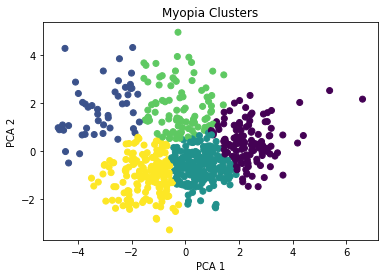

In [25]:
show_clusters(clusters)

In [27]:
import seaborn as sns

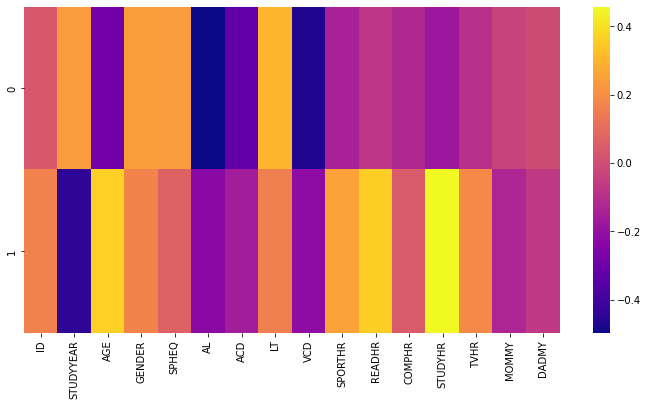

In [46]:
df_comp = pd.DataFrame(pca.components_,columns=df.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma',)